In [2]:
import mne
import numpy as np
import tensorflow as tf
import os


In [3]:
sub_no =25

In [4]:

# Step 1: Load the EDF file
raw = mne.io.read_raw_edf(f'Dataset_clean_for_jupyter/sub-{sub_no}/eeg/sub-{sub_no}_task-Sleep_acq-headband_eeg_2-channels.edf', preload=True)

# Print information about available channels
print(raw.info)

Extracting EDF parameters from C:\Users\naikh\SleepResearchCode_experient\YASA\Dataset_clean_for_jupyter\sub-25\eeg\sub-25_task-Sleep_acq-headband_eeg_2-channels.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\naikh\\SleepResearchCode_experient\\YASA\\Dataset_clean_for_jupyter\\sub-25\\eeg\\sub-25_task-Sleep_acq-headband_eeg_2-channels.edf'

In [4]:
# pip install yasa

Sampling frequency of the instance is already 100.0, returning unmodified.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\naikh\anaconda3\envs\TensorFlowEnv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\naikh\anaconda3\envs\TensorFlowEnv\Lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


<Axes: xlabel='Time [hrs]', ylabel='Stage'>

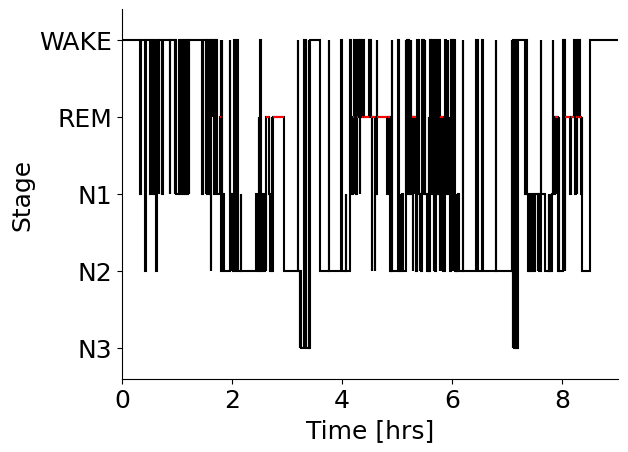

In [19]:
import yasa

# Preprocess your data
# Resample to 100 Hz (common for sleep staging)
raw.resample(100)

# Extract EEG data (adjust channel names to match your file)
# eeg_data = raw.get_data(picks =['HB_1'])
eeg_data = raw.pick_channels(['HB_1'])
sf = raw.info['sfreq']  # Sampling frequency

# Use YASA's sleep staging
from yasa import SleepStaging

# Create the staging instance
staging = SleepStaging(eeg_data, eeg_name='HB_1')

# Predict sleep stages
# Classes: W (Wake), N1, N2, N3, REM
hypno = staging.predict()

# Convert string labels to integers according to YASA's standard mapping
# YASA standard: Wake=0, N1=1, N2=2, N3=3, REM=4
mapping = {'W': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'R': 4}
hypno_int = np.array([mapping[stage] for stage in hypno])

# Now plot with integer values
yasa.plot_hypnogram(hypno_int, sf_hypno=1/30)  

In [6]:
hypno.shape

(1083,)

In [7]:
# Basic information
print("Type of hypno:", type(hypno))
print("Length of hypnogram:", len(hypno))
print("Unique values:", np.unique(hypno))

Type of hypno: <class 'numpy.ndarray'>
Length of hypnogram: 1083
Unique values: ['N1' 'N2' 'N3' 'R' 'W']


In [8]:
hypno

array(['W', 'W', 'W', ..., 'W', 'W', 'W'], dtype=object)

In [14]:
hypno_int

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
unique_values, counts = np.unique(hypno_int, return_counts=True)


In [17]:
unique_values ,counts

(array([0, 1, 2, 3, 4]), array([360, 160, 409,  22, 132]))